# TP 1 Modèles Markoviens 
Echantillonnage de champs markoviens.

Le but de cette séance est de programmer un échantillonneur de Gibbs et de l'étudier dans le cas d'un champ binaire.

Les données et programme sont accessibles sur le site:
http://perso.telecom-paristech.fr/~tupin/cours/IMA203/TPMARKOV

Dans cette section on considère un champ markovien binaire (valeurs dans $E=\{0,1\}$). Le voisinage est défini par la 4-connexité et le potentiel d'une clique d'ordre 2 est défini par  $U_c(0,1)=U_c(1,0)=+\beta$ et $U_c(1,1)=U_c(0,0)=0$ (le potentiel des cliques singleton est nul).


In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

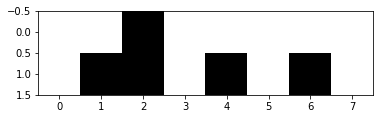

In [ ]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1 
Pour le modèle d'Ising comme défini plus haut et l'image imaU générée dans la cellule précédente, rappeler la formule de l'énergie globale et calculer l'énergie globale d'imaU

#A1 
Formule de l'énergie globale:

$$U(x)=\sum_{c\in C}^{}V_c (x)$$

$$U(x)=11\beta$$

Nous avons que $U_c =\beta$ pour:

- horizontal: (0,1) et (0,2); (0,2) et (0,3) -> 2

(1,0) et (1,1); (1,2) et (1,3); (1,3) et (1,4); (1,4) et (1,5); (1,5) et (1,6); (1,6) et (1,7) -> 6
- vertical: (0,1) et (1,1); (0,4) et (1,4); (0,6) et (1,6) -> 3

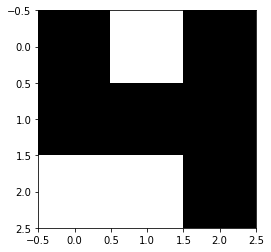

In [ ]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2 
Ecrivez la forme générale de la probabilité conditionnelle locale en un pixel $s$. Pour la configuration de voisinage imaVois générée par la cellule de code précédente, calculer les 2 énergies conditionnelles locales (pour la valeur 0 et pour la valeur 1 du pixel central), puis les probabilités conditionnelles locales (en fonction de $\beta$). Quelle est la classe la plus probable ? (NB : on fera le calcul en 8-connexité).

#A2
Forme générale de la probabilité conditionnelle locale en un pixel  𝑠:
$$\mathbb{P}(X_s = x_s/V_s)=\frac{\exp^{-U_s (x_s,V,s)}}{Z^s}$$


Énergies conditionnelles locales:
$$U_s(x_s, V_s)= \sum_{c \subset C, s \in c}^{} V_c(x_s,V_s)$$

$$U(0, V_s) = 3\beta$$

$$U(1, V_s) = 5\beta$$


Calcul de $Z^s$:
$$Z^s= \sum_{\xi \in E}^{} \exp^{- U_s (\xi,V_s)}$$

$$Z^s= \exp^{-3\beta}+ \exp^{-5\beta}$$


Probabilités conditionnelles locales:
$$\mathbb{P}(X_s = 0/V_s)=\frac{\exp^{-3\beta}}{\exp^{-3\beta}+ \exp^{-5\beta}}$$

$$\mathbb{P}(X_s = 1/V_s)=\frac{\exp^{-5\beta}}{\exp^{-3\beta}+ \exp^{-5\beta}}$$


La classe plus probable c’est la classe 0 (noir), parce que son Énergie $U_s$ est plus petit, donc sa probabilité conditionnelle est plus grande. Il y a du sens, parce qu’il y a plus de voisins noirs. 


## Part 1
Programmation de l'échantillonneur de Gibbs et tirage d'échantillons de modèles markoviens 

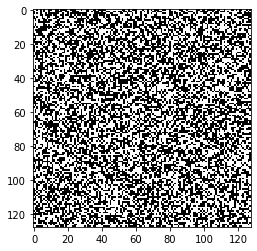

In [ ]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Fonction echan
Compléter la fonction suivante qui prend en entrée une image binaire qui sera mise à jour par échantillonnage de Gibbs et la valeur du paramètre de régularisation 

In [ ]:
def echan(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=0
            if (im_bin[i1][j]==1):
                Ureg0+=beta_reg
            if (im_bin[i2][j]==1):
                Ureg0+=beta_reg
            if (im_bin[i][j1]==1):
                Ureg0+=beta_reg
            if (im_bin[i][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 1
            Ureg1=0
            if (im_bin[i1][j]==0):
                Ureg1+=beta_reg
            if (im_bin[i2][j]==0):
                Ureg1+=beta_reg
            if (im_bin[i][j1]==0):
                Ureg1+=beta_reg
            if (im_bin[i][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

En faisant varier la valeur du paramètre de régularisation et en relançant la cellule, observez. Vous pouvez enlever la visualisation en cours d'échantillonnage et augmenter le nombre d'itérations. 


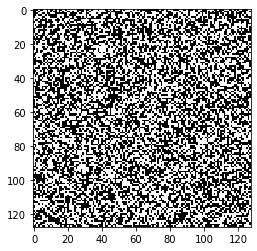

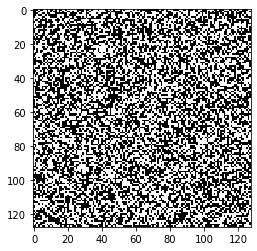

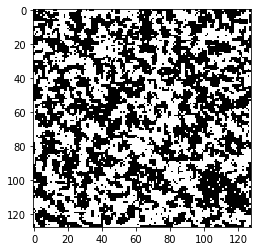

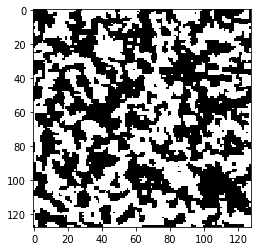

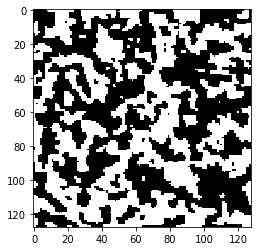

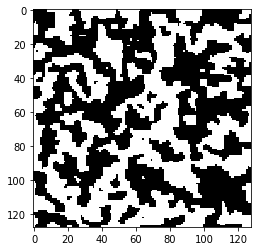

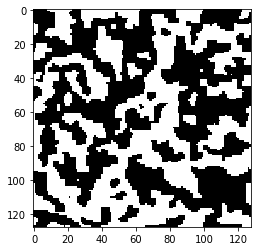

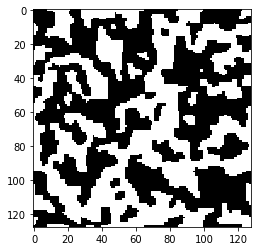

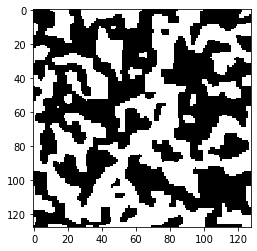

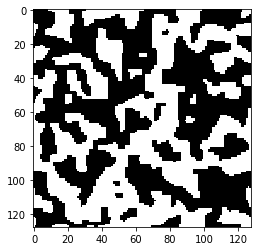

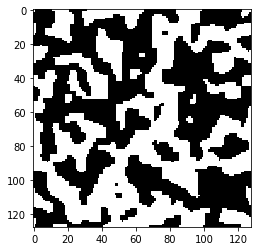

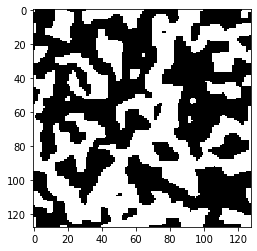

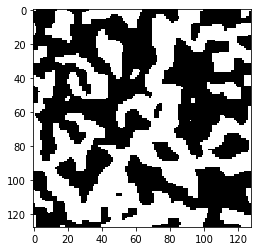

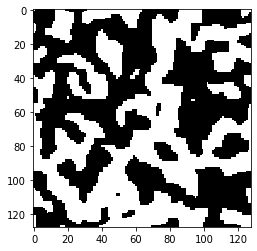

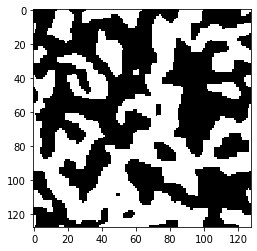

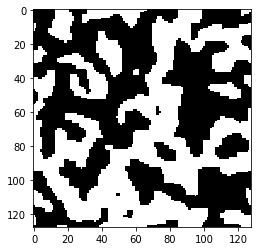

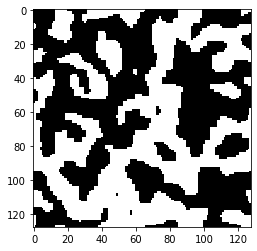

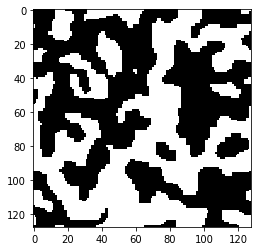

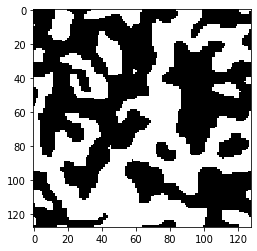

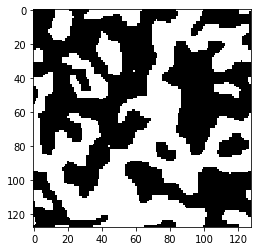

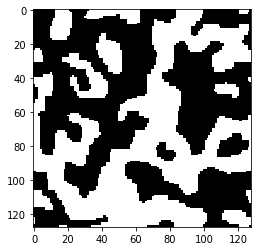

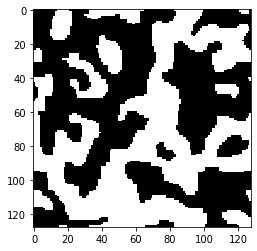

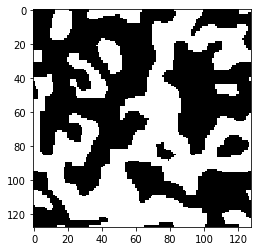

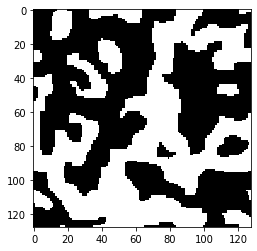

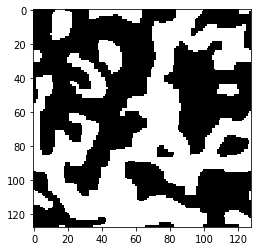

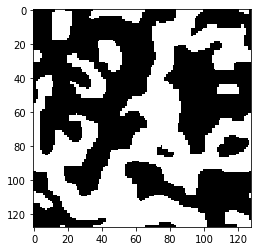

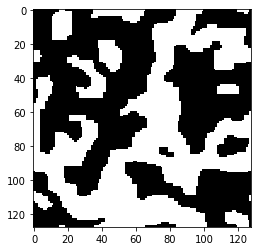

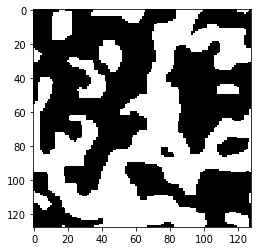

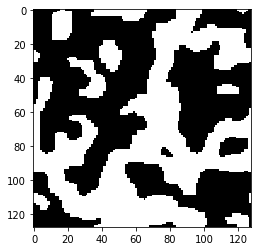

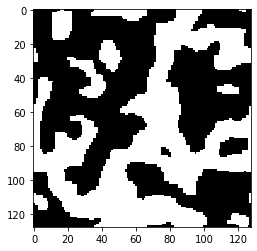

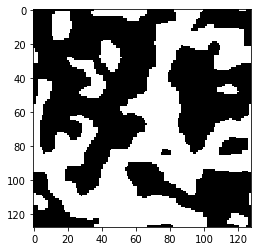

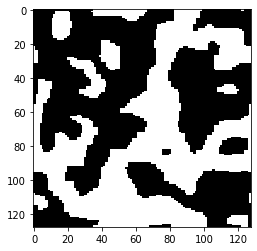

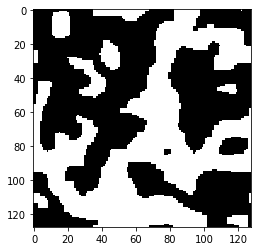

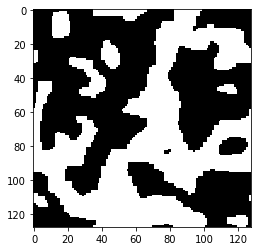

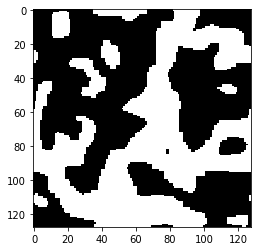

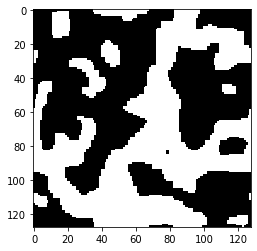

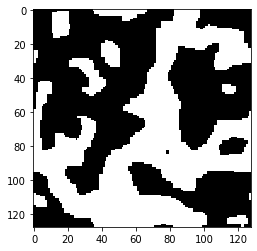

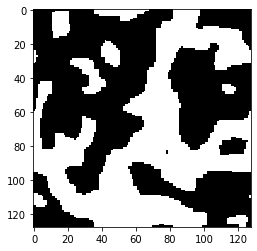

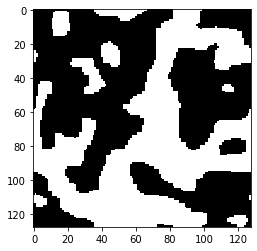

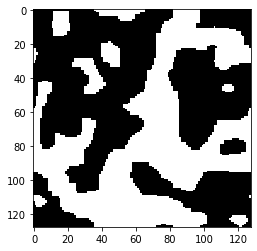

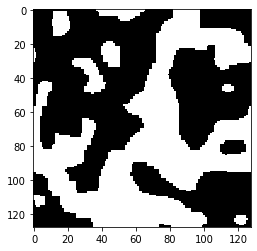

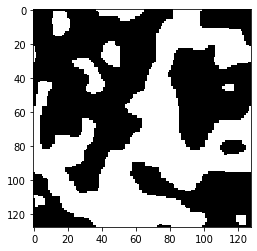

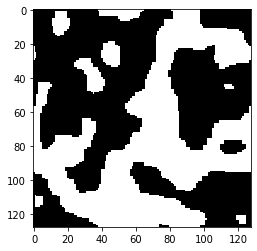

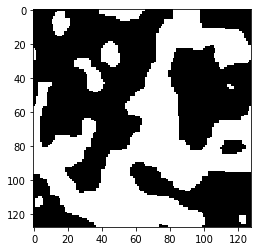

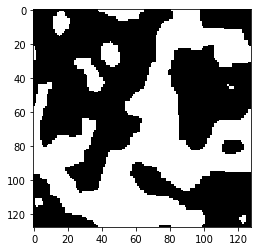

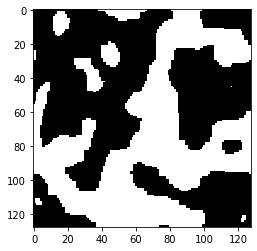

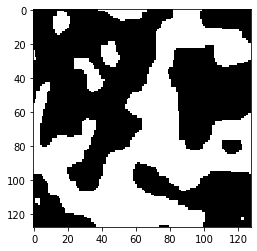

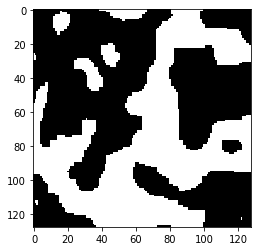

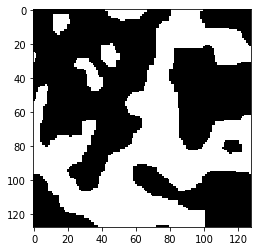

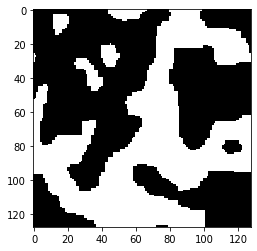

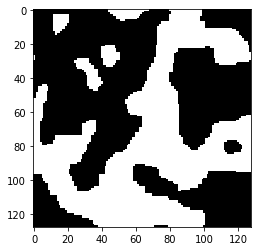

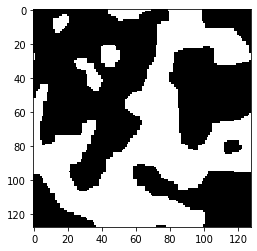

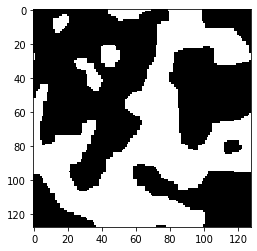

In [ ]:
#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 10

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Faites tourner le programme plusieurs fois. Obtenez vous toujours la même image ? Commentez. 

#A3 
Non. Nous obtenonsdes images différentes. Quand nous disons que l’algorithme converge, ça veut direqu’il converge par un résultat qui respecte la loi de probabilité, pas nécessairementle même résultat.

#Q4
Faites varier $\beta$ de 0.5 à 20. Commentez les résultats. 

#A4 
Pour un $\beta$ très faible comme 0.5, le résultat est très proche à l’image randomisé du début. Quand nous augmentons $\beta$ , il va apparaître plus de zones homogènes noiresou claires.      

#Q5 
Quelle est l'image qui minimise globalement l'énergie pour ce modèle ? 

#A5 
L'image que minimise globalement l'énergie pour ce modèle est une image où tous les pixels sont égaux à zéro (noirs) ou tous sont égaux à un (clairs).

#Q6
Changez $\beta$ et donnez lui une valeur négative. Décrivez le résultat et justifiez le. 

#A6 
L’image résultant a beaucoup de pixels noirs qui font de voisinage avec des pixels clairs. Comme beta c’est négatif, nous inverserons quelle classe a la plus grande énergie. Donc si un pixel que nous voulons estimé a plus de voisins de classe 0, l'énergie de classe 0 va être plus grande que de la classe 1, donc il va avoir une probabilité plus grande d' être prédit comme classe 1.  

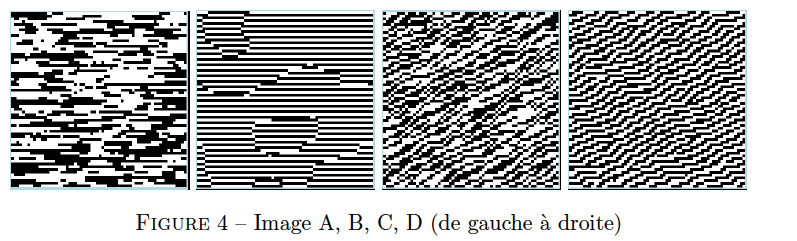

#Q7 
On travaille maintenant en 8 connexité, mais toujours avec des cliques d'ordre 2 (non isotropes cette fois). Pour chacune des images suivantes, proposez les potentiels des cliques qui permettent d'obtenir ces réalisations. Au départ tous les potentiels de clique sont nuls. 


*   Image A : il y a un seul potentiel de clique d'ordre 2 qui vaut -1.
*    Image B : en plus du précédent, il y a un potentiel de clique d'ordre 2 qui vaut 1. Indiquez lequel.
*    Image C : en plus des 2 précédents, il y a un potentiel de clique d'ordre 2 qui vaut -1. Indiquez lequel.
*    Image D : en plus des 3 précédents, il y a un potentiel de clique d'ordre 2 qui vaut +1. Indiquez lequel.




#A7 Analyser une image. Regarder les configurations qui apparaissent plus fréquemment:

*Mettre un potentiel négatif pour les favoriser*

**OU**

*Mettre un potentiel positif sur la configuration opposée*

- **Image A:** (-1), donc nous voulons favoriser la configuration plus fréquente : le potentiel de **l'horizontal** va être égale à -1 pour V(0,0) et V(1,1). 

- **Image B:** (+1), donc nous voulons defavoriser la configuration opposée: le potentiel de **la vertical** va être égale à 1 pour V(0,0) et V(1,1).

- **Image C:** (-1), donc nous voulons favoriser la configuration plus fréquente : le potentiel de **la diagonal à 45 dégrées** va être égale à -1 pour V(0,0) et V(1,1).

- **Image D:** (+1), donc nous voulons defavoriser la configuration opposée : le potentiel de **la diagonal à 135 dégrées** va être égale à 1 pour V(0,0) et V(1,1).

#Q8
Modifiez votre programme pour définir un modèle d'Ising avec un potentiel attractif en diagonale uniquement (les autres potenttiels sont nuls). Commentez le résultat. 

In [ ]:
def echanD(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=0
            if (im_bin[i1][j1]==1):
                Ureg0+=beta_reg
            if (im_bin[i2][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 1
            Ureg1=0
            if (im_bin[i1][j1]==0):
                Ureg1+=beta_reg
            if (im_bin[i2][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

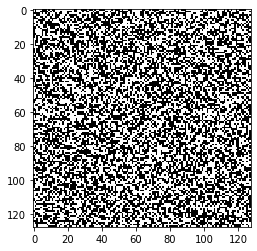

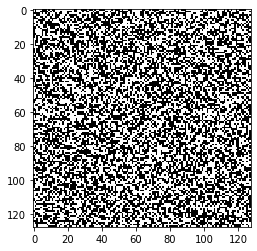

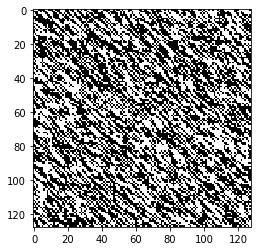

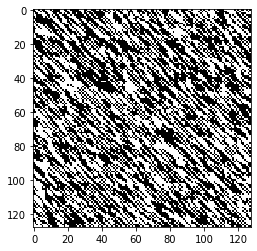

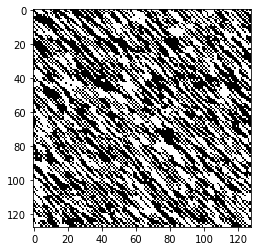

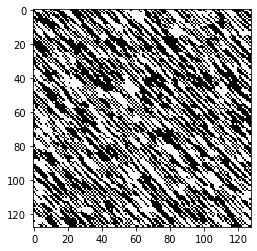

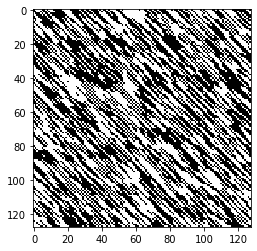

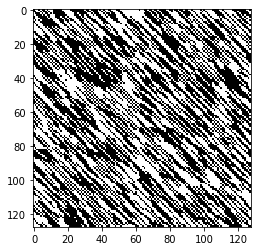

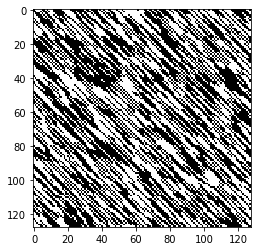

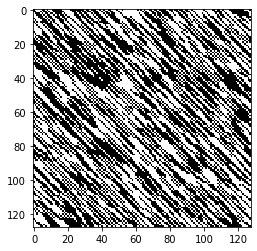

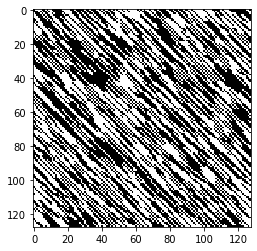

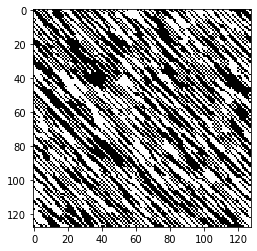

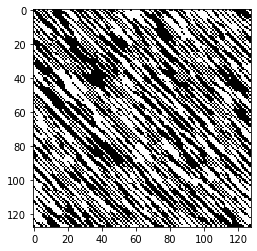

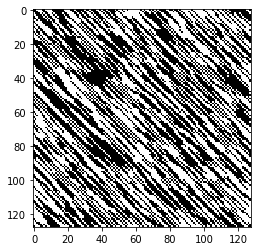

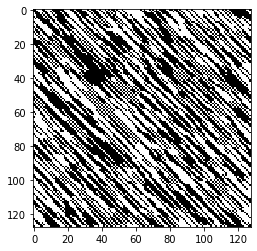

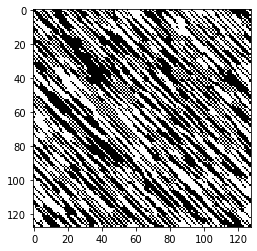

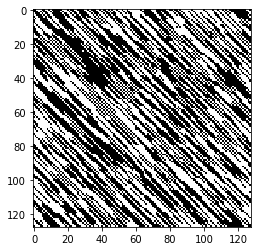

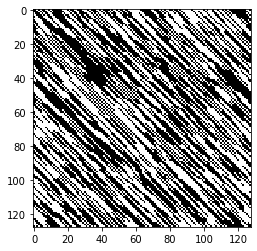

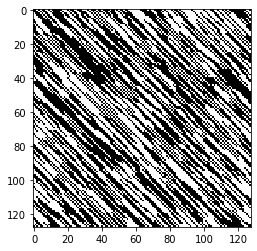

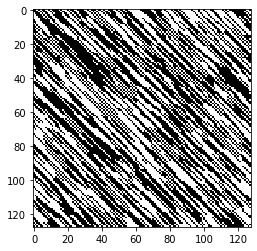

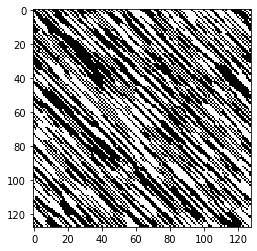

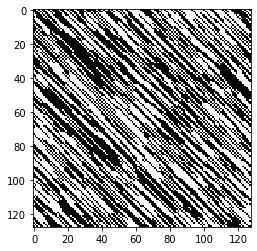

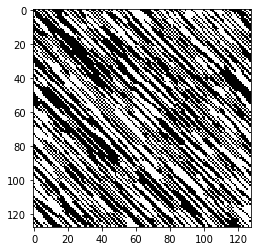

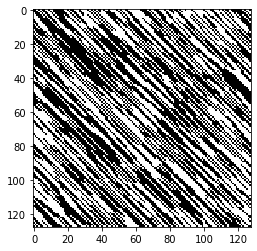

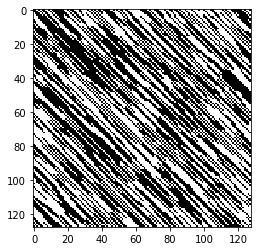

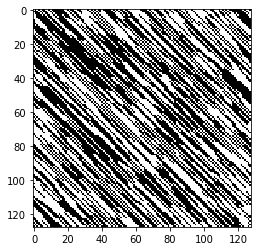

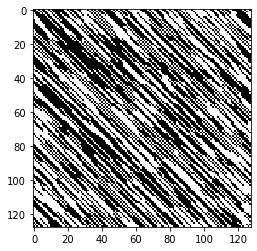

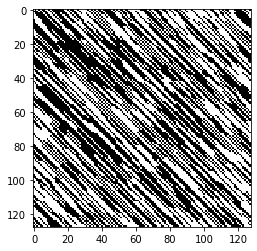

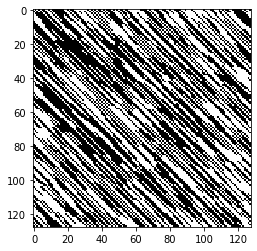

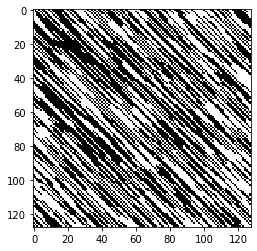

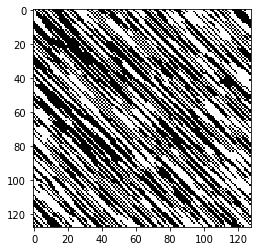

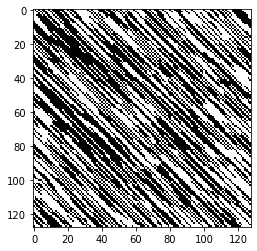

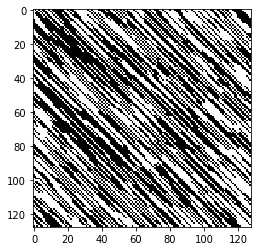

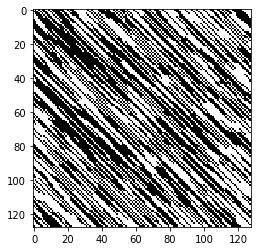

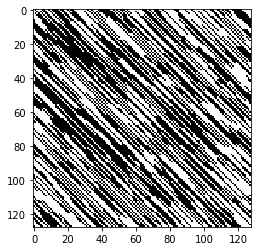

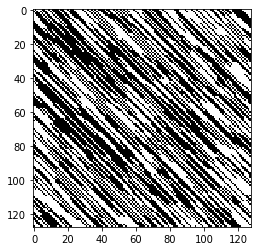

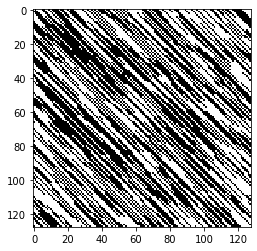

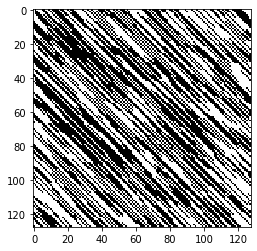

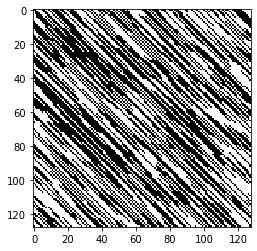

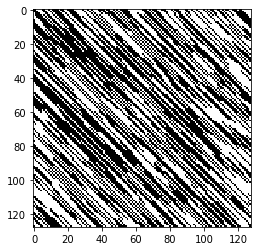

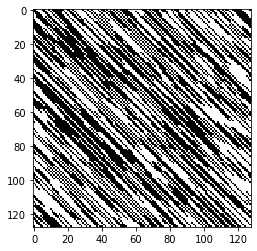

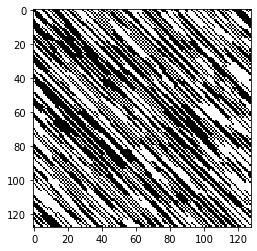

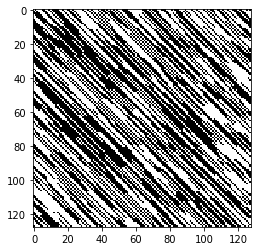

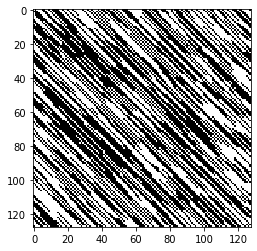

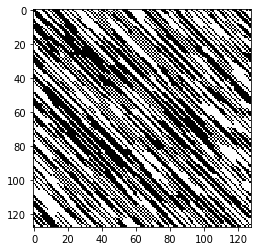

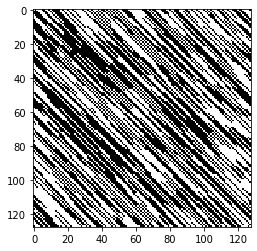

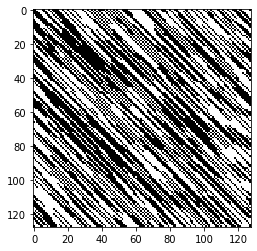

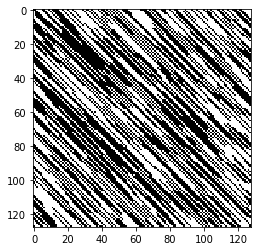

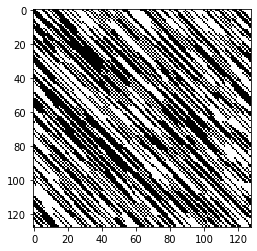

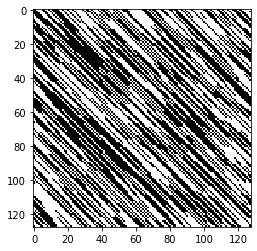

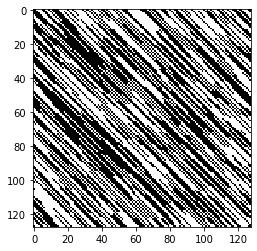

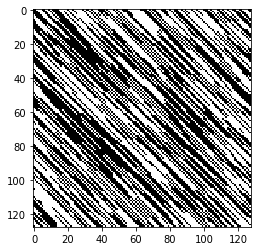

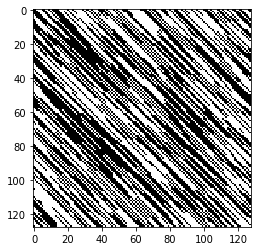

In [ ]:
#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg= 5

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(50):  
    echanD(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()

#A8 
Si nous mettons un potentiel attractif pour la diagonale, donc on va favoriser la diagonale (nous avons choisi la diagonale de 135 degrés). Pour faire ça, nous pouvons mettre un potentiel négatif sur V(0,0) et V(1,1), pour le favoriser ou un potentiel positif sur V(1,0) et V(0,1) pour le défavoriser (c’est le deuxième que nous avons faire).


Nous pouvons observer sur l’image que laconfiguration qui apparaît sont des lignes noires ou claires sur la diagonalede 135 degrés. 